In [2]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

Cdir = '/global/cfs/cdirs/m3623/datasets/RLtest/'
with h5py.File(Cdir+'data.h5', 'r') as f:
    sympt = f['symptomatic3D'][...]
    bios = f['parBio'][...]
    unis = f['uniBio'][...]
    
print(sympt.shape)
print(bios.shape)
print(unis.shape)

datFile = '/global/homes/p/pharring/covid/epiCorvid/corvid_march/corviddata/seattle-tracts.dat'
dat = np.genfromtxt(datFile, delimiter=',')[:,3]
print(dat.shape)

(10048, 124, 5, 365)
(10048, 9)
(10048, 9)
(124,)


(10048, 5, 365)


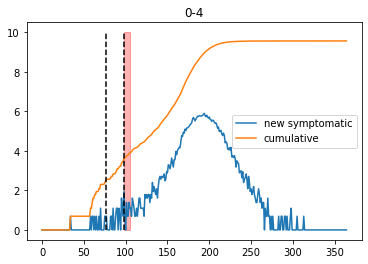

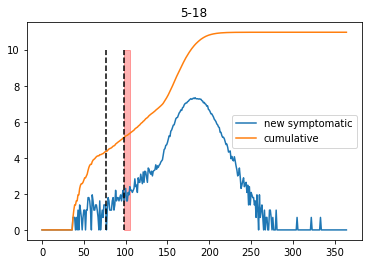

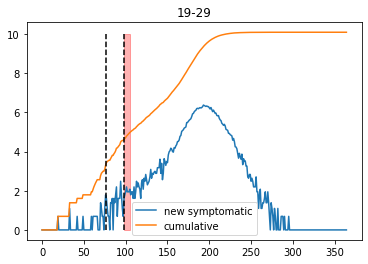

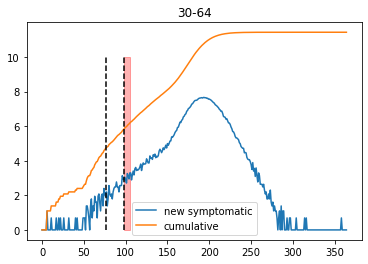

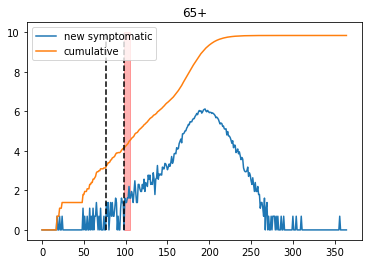

In [12]:
agg = np.sum(sympt, axis=1)
print(agg.shape)
pop = np.sum(dat)
idx = np.random.randint(agg.shape[0])


newsympt = agg[idx]
totinfect = np.cumsum(newsympt, axis=1)

day = 7*np.random.randint(3, 50)

for i, age in enumerate(['0-4', '5-18', '19-29', '30-64', '65+']):
    plt.figure()
    plt.plot(np.log1p(newsympt[i]), label='new symptomatic')
    plt.plot(np.log1p(totinfect[i]), label='cumulative')
    plt.plot([day, day], [0,10], 'k--')
    plt.plot([day-21, day-21], [0,10], 'k--')
    plt.fill_between([day,day+7], [0,0], [10,10], color='red', alpha=0.3)
    plt.title(age)
    plt.legend()
    plt.show()45